In [50]:
import pandas as pd
idx = pd.IndexSlice
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from bisect import bisect_left, bisect_right

In [51]:
import bmp2mpl

In [52]:
def find_lt(a, x):
    'Find rightmost value less than x'
    i = bisect_right(a, x)
    if i!=len(a):
        return i
    return None

In [53]:
bmp2mpl.convert_to_markers(r"C:\Users\A\repos\bmp2mpl\images")

bmp2mpl.markers.keys()

dict_keys(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E1', 'E2', 'H1', 'H2', 'H3'])

In [54]:
df = pd.read_csv(r"https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")

In [55]:
df['Date']=df['Date'].apply(lambda t: pd.to_datetime(str(t), format='%Y%m%d'))
df

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,Aruba,ABW,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,Aruba,ABW,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,Aruba,ABW,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
4,Aruba,ABW,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25444,Kosovo,RKS,2020-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25445,Kosovo,RKS,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25446,Kosovo,RKS,2020-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.93,NaN,74.52,NaN,68.59,NaN,69.7,NaN,62.5
25447,Kosovo,RKS,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.93,NaN,74.52,NaN,68.59,NaN,69.7,NaN,62.5


In [56]:
if not 'df_pops' in globals():
    df_pops=pd.read_csv(r"https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv")
df_=df_pops
high_pops = df_[(df_['Time']==2019) & (df_['PopTotal']>10e6/1e3)].sort_values("PopTotal", ascending=False)['Location']

In [57]:
if not 'df_eu' in globals():
    df_eu=pd.read_csv(r"https://github.com/ajturner/acetate/raw/master/places/Countries-Europe.csv")
df_=df_eu
eu=df_['name']

In [58]:
high_eu = list(set(eu) & (set(high_pops)))
high_eu

['Italy',
 'Netherlands',
 'Poland',
 'Greece',
 'Portugal',
 'France',
 'Ukraine',
 'Germany',
 'Romania',
 'United Kingdom',
 'Sweden',
 'Spain',
 'Belgium']

In [59]:
measures = [col for col in df.columns if "_" in col and "Flag" not in col]
measures

['C1_School closing',
 'C2_Workplace closing',
 'C3_Cancel public events',
 'C4_Restrictions on gatherings',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'E1_Income support',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'M1_Wildcard']

In [60]:
df_=df.set_index(["CountryName","Date"])
df_=df_.unstack("CountryName")
df__=df_['ConfirmedDeaths']
df__.index=df__.index-datetime.timedelta(weeks=3)

df__.columns= pd.MultiIndex.from_product([["ConfirmedDeathsShifted"],df__.columns])
df_=pd.concat([df_,df__],axis=1)

In [61]:
interesting = [
#  'Greece',
 'France',
 'Spain',
 'Sweden',
#  'Portugal',
 'Ukraine',
 'Germany',
#  'Netherlands',
 'United Kingdom',
#  'Poland',
 'Romania',
 'Italy',
#  'Belgium',
  'South Korea',
    'China',
    'United States'
]
interesting=sorted(interesting)

df_=df_.loc[:,idx[:,interesting]]
df_interesting = df_
df_interesting

CountryCode                                                        \
CountryName       China France Germany Italy Romania South Korea Spain Sweden   
Date                                                                            
2019-12-11          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-12          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-13          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-14          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-15          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
...                 ...    ...     ...   ...     ...         ...   ...    ...   
2020-05-27          CHN    FRA     DEU   ITA     ROU         KOR   ESP    SWE   
2020-05-28          CHN    FRA     DEU   ITA     ROU         KOR   ESP    SWE   
2020-05-29          NaN    NaN     NaN   ITA     NaN         KOR   ESP    SWE   
2020-05-30          NaN    NaN     NaN   ITA     NaN         KOR   ESP    SWE   
2020-05-31          NaN    NaN     NaN   ITA     NaN         KOR   ESP    SWE   

                                    ... ConfirmedDeathsShifted                \
CountryName Ukraine United Kingdom  ...                 France Germany Italy   
Date                                ...                                        
2019-12-11      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-12      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-13      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-14      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-15      NaN            NaN  ...                    0.0     0.0   0.0   
...             ...            ...  ...                    ...     ...   ...   
2020-05-27      UKR            GBR  ...                    NaN     NaN   NaN   
2020-05-28      UKR            GBR  ...                    NaN     NaN   NaN   
2020-05-29      NaN            NaN  ...                    NaN     NaN   NaN   
2020-05-30      NaN            NaN  ...                    NaN     NaN   NaN   
2020-05-31      NaN            NaN  ...                    NaN     NaN   NaN   

                                                                     \
CountryName Romania South Korea Spain Sweden Ukraine United Kingdom   
Date                                                                  
2019-12-11      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-12      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-13      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-14      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-15      0.0         0.0   0.0    0.0     NaN            0.0   
...             ...         ...   ...    ...     ...            ...   
2020-05-27      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-28      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-29      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-30      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-31      NaN         NaN   NaN    NaN     NaN            NaN   

                           
CountryName United States  
Date                       
2019-12-11            0.0  
2019-12-12            0.0  
2019-12-13            0.0  
2019-12-14            0.0  
2019-12-15            0.0  
...                   ...  
2020-05-27            NaN  
2020-05-28            NaN  
2020-05-29            NaN  
2020-05-30            NaN  
2020-05-31            NaN  

[173 rows x 451 columns]

In [62]:
from bs4 import BeautifulSoup
import pandas as pd
import lxml
# import html5lib

path = r"https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md"

import urllib

link =  "https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md"
f = urllib.request.urlopen(link)
myfile = f.read()

data = myfile.decode().replace("<br>", 'sdf')

df_desc = pd.concat(pd.read_html(data))
df_desc=df_desc.set_index("ID")


a=df_desc.loc["C1","Coding"].split("sdf")
a

['0 - no measures ',
 '1 - recommend closing ',
 '2 - require closing (only some levels or categories, eg just high school, or just public schools) ',
 '3 - require closing all levels ',
 'Blank - no data']

In [63]:
df_['C1_School closing']

CountryName,China,France,Germany,Italy,Romania,South Korea,Spain,Sweden,Ukraine,United Kingdom,United States
Date,,,,,,,,,,,
2019-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,NaN,NaN,2.0,3.0,3.0,NaN,NaN,1.0,2.0,3.0,3.0
2020-05-28,NaN,NaN,2.0,3.0,3.0,NaN,NaN,1.0,2.0,NaN,NaN
2020-05-29,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU


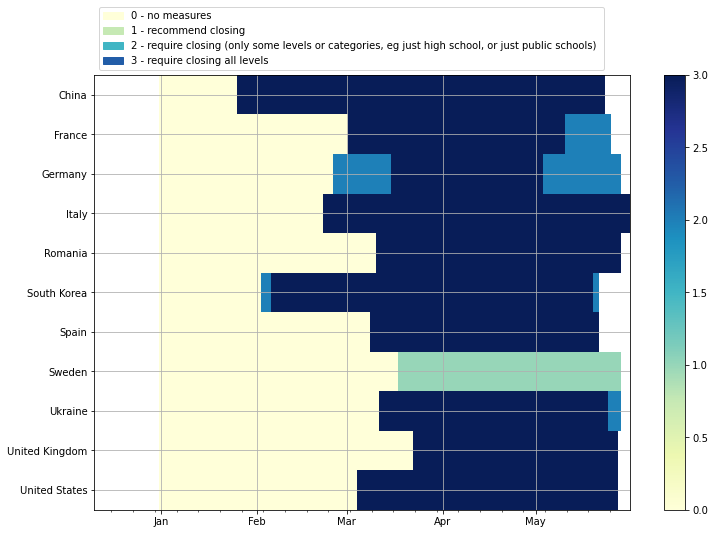

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
df= df_['C1_School closing'].T

dates = df.columns.to_pydatetime()
dnum = mdates.date2num(dates)
start = dnum[0] - (dnum[1]-dnum[0])/2.
stop = dnum[-1] + (dnum[1]-dnum[0])/2.
extent = [start, stop, -0.5, len(df.index)-0.5]

im = ax.imshow(df, extent=extent, aspect="auto", cmap='YlGnBu')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.yaxis.set_major_locator(MultipleLocator(1))
fig.colorbar(im)
ax.grid(True)
# ax.set_ylim(-5,len(df.index)+10)
ax.set_yticklabels(labels=['']+sorted(df.index,reverse=True), ha='right')



import matplotlib.patches as mpatches
import matplotlib


cmap = matplotlib.cm.get_cmap('YlGnBu')

a=df_desc.loc["C1","Coding"].split("sdf")[:-1]
patches = [mpatches.Patch(color=cmap(i/(len(a))), label=desc)
           for i,desc in enumerate(a)]
ax.legend(handles=patches, loc='lower left', bbox_to_anchor=(0, 1) )

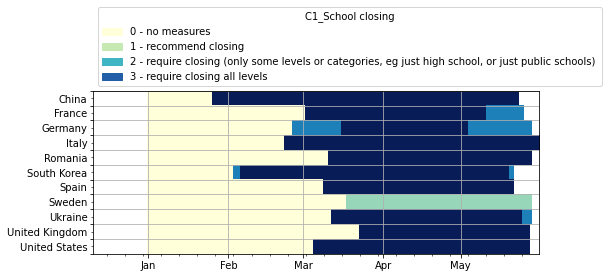

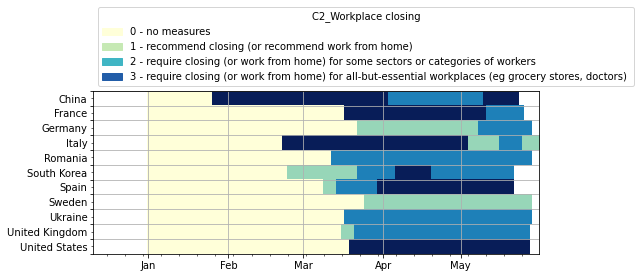

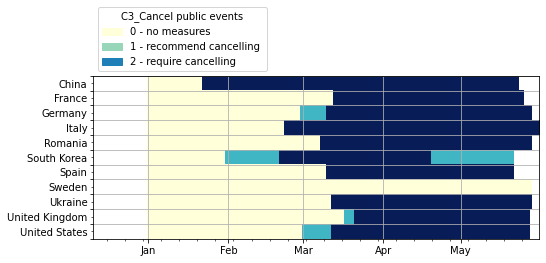

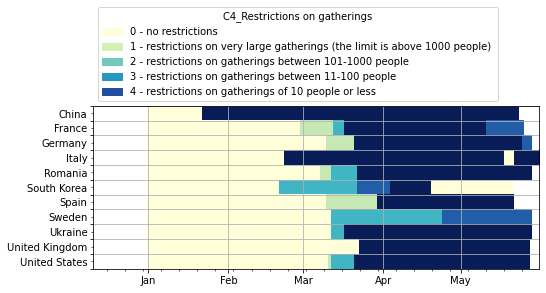

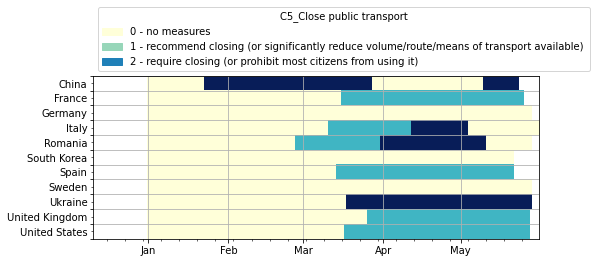

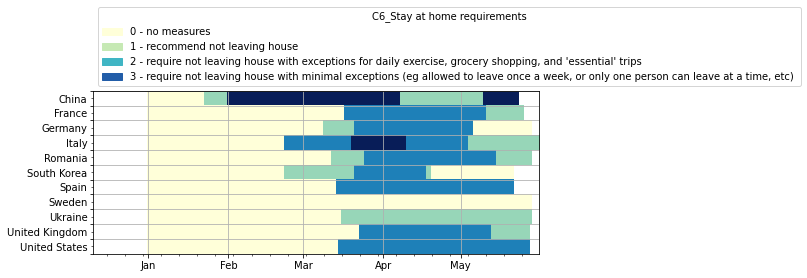

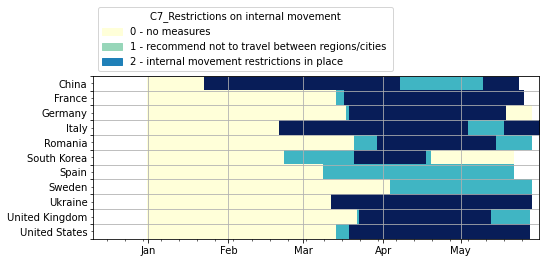

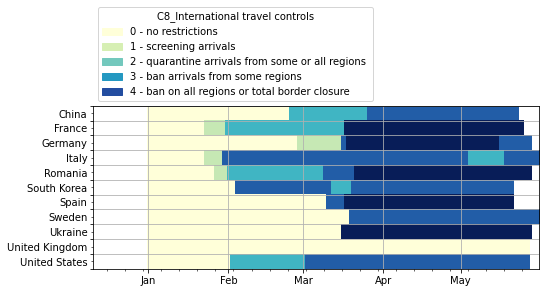

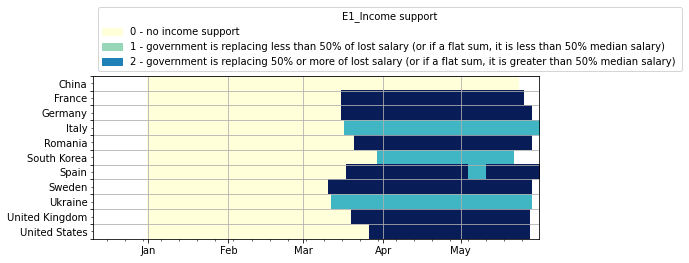

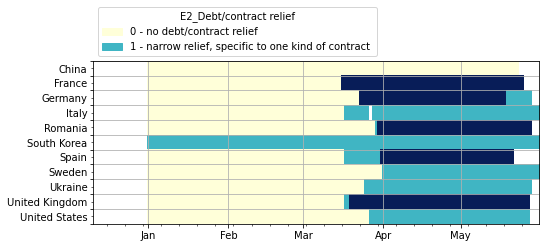

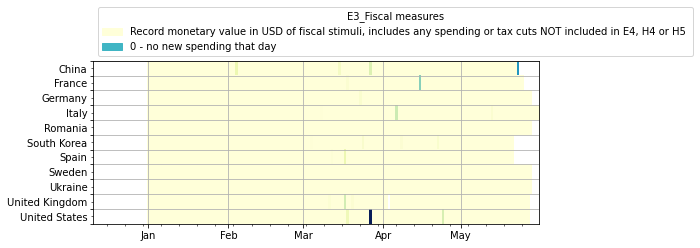

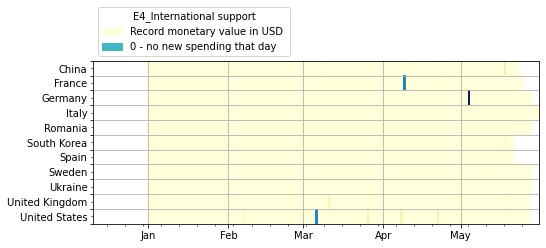

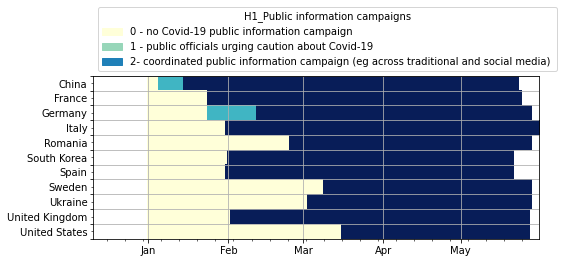

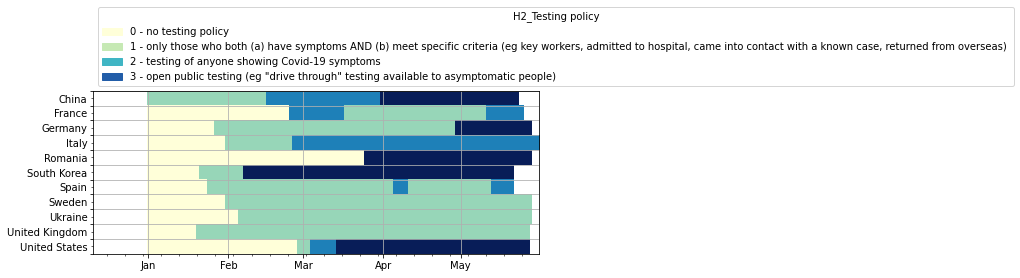

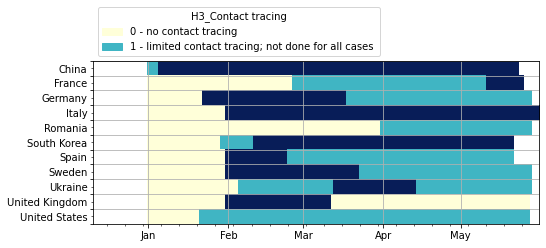

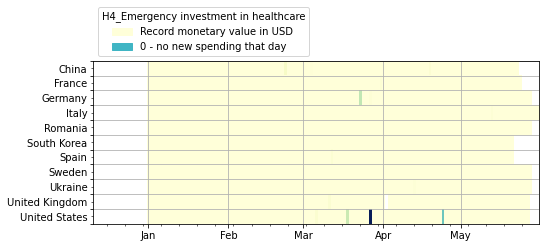

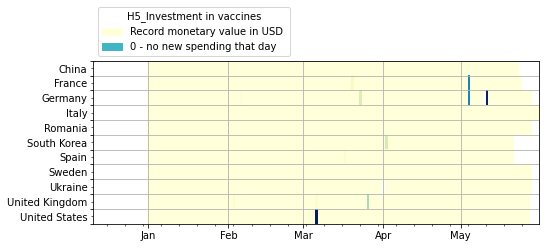

C:\Users\A\anaconda3\envs\corona\lib\site-packages\matplotlib\image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\A\anaconda3\envs\corona\lib\site-packages\matplotlib\image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\A\anaconda3\envs\corona\lib\site-packages\matplotlib\image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\A\anaconda3\envs\corona\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


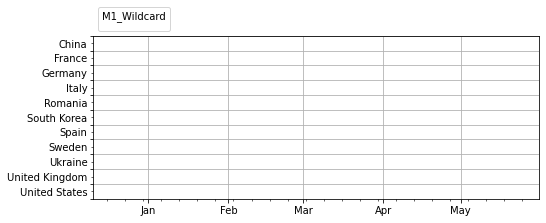

In [67]:
def my_plot(measure):
    fig, ax = plt.subplots(figsize=(8,3))
    df= df_[measure].T

    dates = df.columns.to_pydatetime()
    dnum = mdates.date2num(dates)
    start = dnum[0] - (dnum[1]-dnum[0])/2.
    stop = dnum[-1] + (dnum[1]-dnum[0])/2.
    extent = [start, stop, 0, len(df.index)]

    im = ax.imshow(df, extent=extent, aspect="auto", cmap='YlGnBu', interpolation='none')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
#     fig.colorbar(im)
    ax.grid(True)
    # # ax.set_ylim(-5,len(df.index)+10)
    ax.set_yticks(np.arange(0.5,len(df.index)+0.5),minor=True)
    ax.set_yticklabels(labels=sorted(df.index,reverse=True), ha='right', minor=True)
    ax.set_yticklabels(labels=[], ha='right', minor=False)
#     ax.set_title(measure)
    
    a=df_desc.loc[measure[:2],"Coding"].split("sdf")[:-1]
    patches = [mpatches.Patch(color=cmap(i/(len(a))), label=desc)
               for i,desc in enumerate(a)]
    ax.legend(handles=patches, loc='lower left', bbox_to_anchor=(0, 1),title=measure )

for measure in measures:
    my_plot(measure)

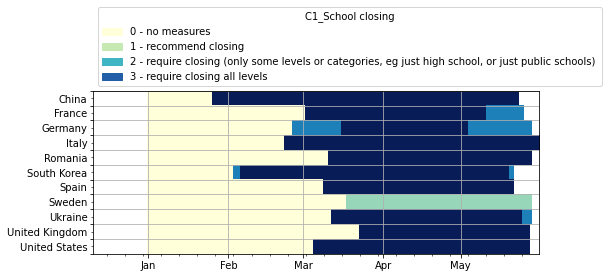

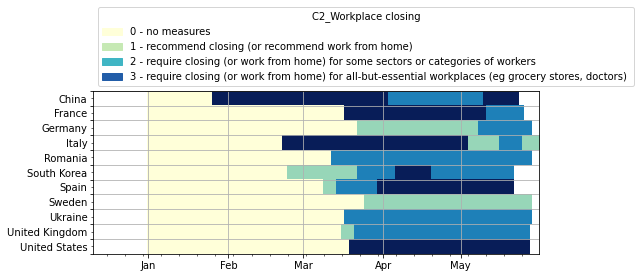

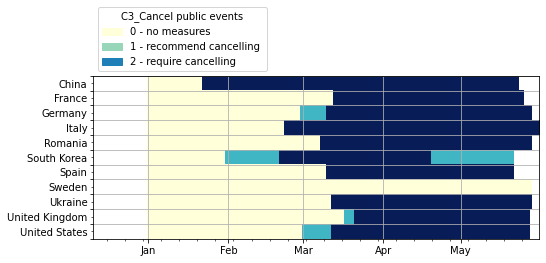

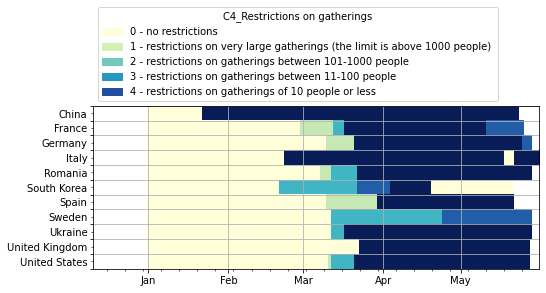

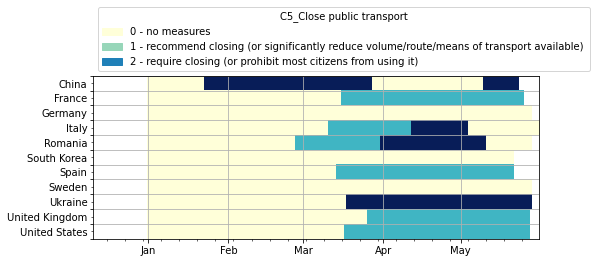

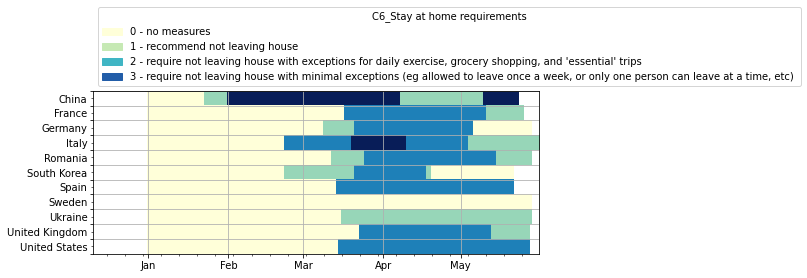

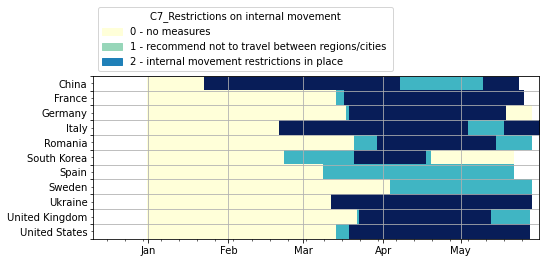

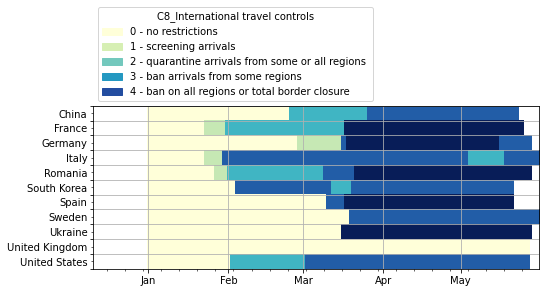

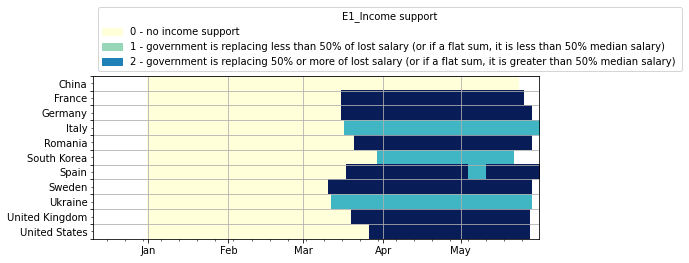

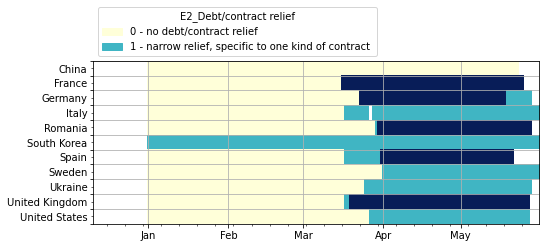

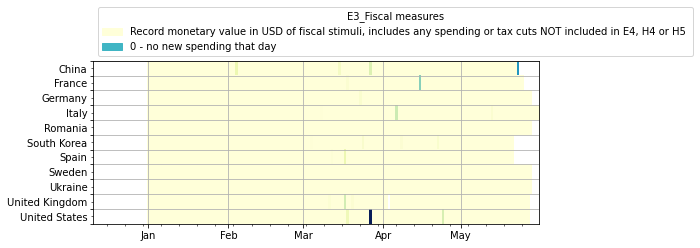

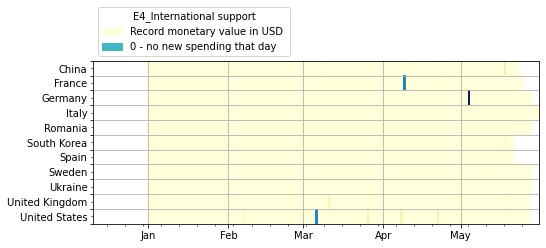

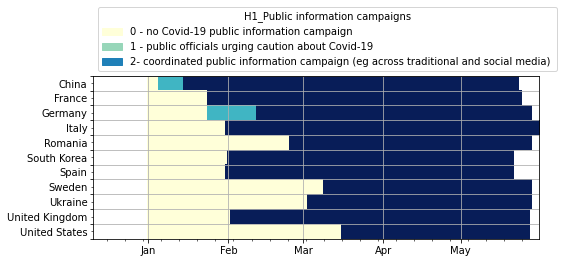

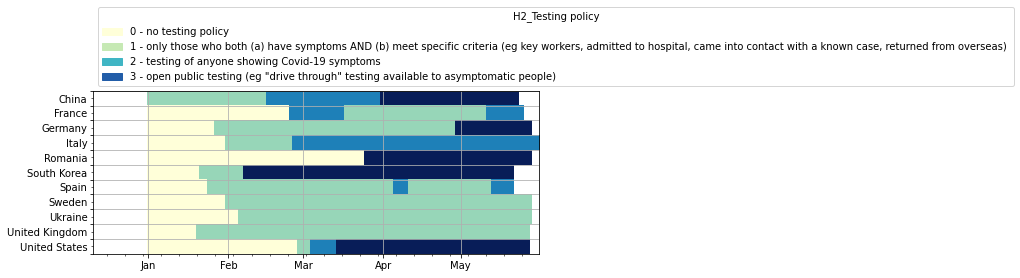

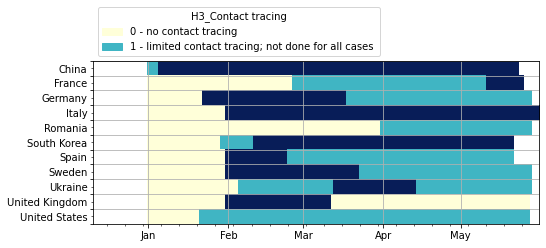

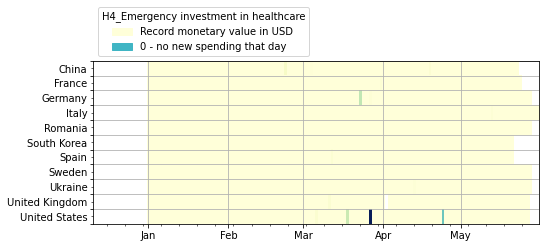

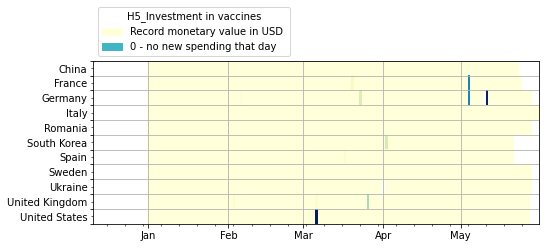

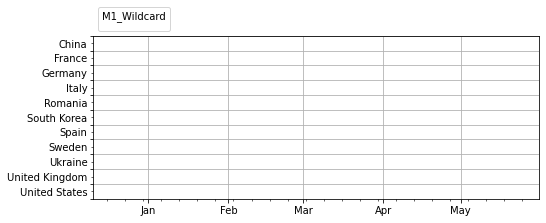

In [68]:
def my_plot(measure):
    fig, ax = plt.subplots(figsize=(8,3))
    df= df_[measure].T

    dates = df.columns.to_pydatetime()
    dnum = mdates.date2num(dates)
    start = dnum[0] - (dnum[1]-dnum[0])/2.
    stop = dnum[-1] + (dnum[1]-dnum[0])/2.
    extent = [start, stop, 0, len(df.index)]

    im = ax.imshow(df, extent=extent, aspect="auto", cmap='YlGnBu', interpolation='none')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
#     fig.colorbar(im)
    ax.grid(True)
    # # ax.set_ylim(-5,len(df.index)+10)
    ax.set_yticks(np.arange(0.5,len(df.index)+0.5),minor=True)
    ax.set_yticklabels(labels=sorted(df.index,reverse=True), ha='right', minor=True)
    ax.set_yticklabels(labels=[], ha='right', minor=False)
#     ax.set_title(measure)
    
    a=df_desc.loc[measure[:2],"Coding"].split("sdf")[:-1]
    patches = [mpatches.Patch(color=cmap(i/(len(a))), label=desc)
               for i,desc in enumerate(a)]
    ax.legend(handles=patches, loc='lower left', bbox_to_anchor=(0, 1),title=measure )

for measure in measures:
    my_plot(measure)

In [69]:
df_interesting

CountryCode                                                        \
CountryName       China France Germany Italy Romania South Korea Spain Sweden   
Date                                                                            
2019-12-11          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-12          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-13          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-14          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
2019-12-15          NaN    NaN     NaN   NaN     NaN         NaN   NaN    NaN   
...                 ...    ...     ...   ...     ...         ...   ...    ...   
2020-05-27          CHN    FRA     DEU   ITA     ROU         KOR   ESP    SWE   
2020-05-28          CHN    FRA     DEU   ITA     ROU         KOR   ESP    SWE   
2020-05-29          NaN    NaN     NaN   ITA     NaN         KOR   ESP    SWE   
2020-05-30          NaN    NaN     NaN   ITA     NaN         KOR   ESP    SWE   
2020-05-31          NaN    NaN     NaN   ITA     NaN         KOR   ESP    SWE   

                                    ... ConfirmedDeathsShifted                \
CountryName Ukraine United Kingdom  ...                 France Germany Italy   
Date                                ...                                        
2019-12-11      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-12      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-13      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-14      NaN            NaN  ...                    0.0     0.0   0.0   
2019-12-15      NaN            NaN  ...                    0.0     0.0   0.0   
...             ...            ...  ...                    ...     ...   ...   
2020-05-27      UKR            GBR  ...                    NaN     NaN   NaN   
2020-05-28      UKR            GBR  ...                    NaN     NaN   NaN   
2020-05-29      NaN            NaN  ...                    NaN     NaN   NaN   
2020-05-30      NaN            NaN  ...                    NaN     NaN   NaN   
2020-05-31      NaN            NaN  ...                    NaN     NaN   NaN   

                                                                     \
CountryName Romania South Korea Spain Sweden Ukraine United Kingdom   
Date                                                                  
2019-12-11      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-12      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-13      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-14      0.0         0.0   0.0    0.0     NaN            0.0   
2019-12-15      0.0         0.0   0.0    0.0     NaN            0.0   
...             ...         ...   ...    ...     ...            ...   
2020-05-27      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-28      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-29      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-30      NaN         NaN   NaN    NaN     NaN            NaN   
2020-05-31      NaN         NaN   NaN    NaN     NaN            NaN   

                           
CountryName United States  
Date                       
2019-12-11            0.0  
2019-12-12            0.0  
2019-12-13            0.0  
2019-12-14            0.0  
2019-12-15            0.0  
...                   ...  
2020-05-27            NaN  
2020-05-28            NaN  
2020-05-29            NaN  
2020-05-30            NaN  
2020-05-31            NaN  

[173 rows x 451 columns]

In [70]:
measure=measures[0]
for measure in measures:
    pass

In [71]:
import matplotlib.colors as clr
import numpy as np

In [72]:
import matplotlib 
import matplotlib.lines as mlines
from matplotlib import rc

rc('text', usetex=False)

dark_colors = list(matplotlib.cm.get_cmap('Dark2').colors)

In [73]:
from copy import copy

In [74]:
def get_list_of_codings(measure):
    codings = df_desc.loc[measure[:2],"Coding"].split("sdf")
    out = []
    for item in codings:
        try:
            int(item.replace(" ","")[:1])
            out.append(item)
        except:
            pass
    return out

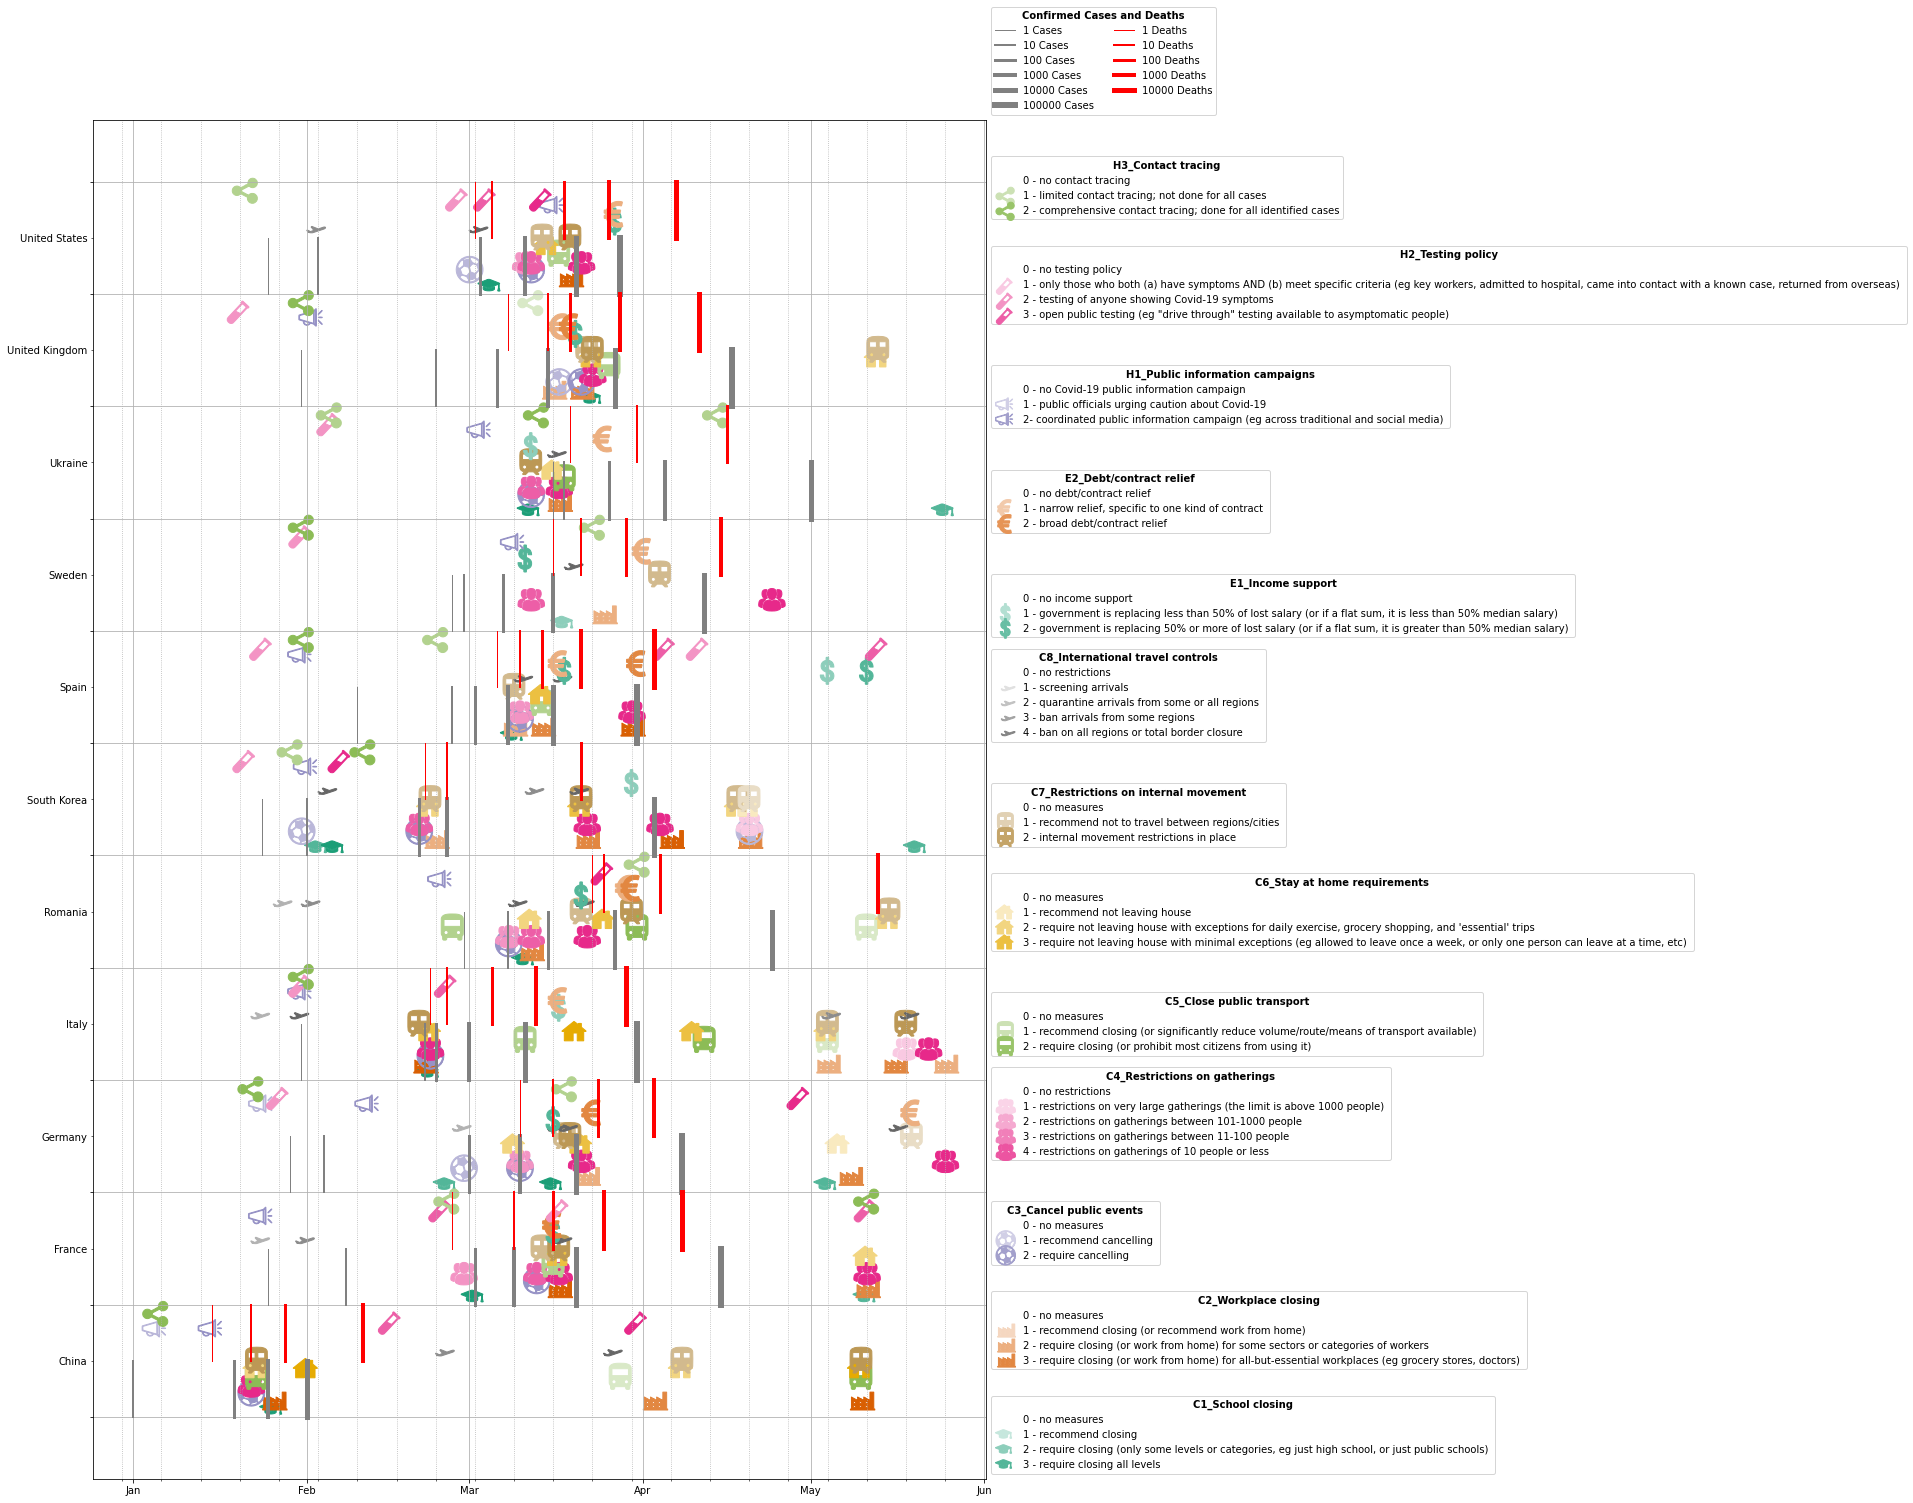

In [95]:
n_measures_of_interest = len(bmp2mpl.markers.keys())+1

measures_of_interest = [measure for measure in measures if measure[:2] in bmp2mpl.markers]
lgd1=None
fig,ax = plt.subplots(figsize=(16,25))
for i, measure in enumerate(measures_of_interest):
    marker = bmp2mpl.markers[measure[:2]]
    df= df_interesting[measure]

    diff = df.diff().unstack()
    df_=pd.DataFrame([df.diff().unstack(),df.unstack()]).T
    df_.columns = ['diff' ,'value']
    df = df_[(diff > 0) | (diff < 0)].reset_index()
    df['y'] = df['CountryName'].apply(lambda x:interesting.index(x)+i/n_measures_of_interest+1/n_measures_of_interest)
    
    cmap = clr.LinearSegmentedColormap.from_list(measure, [(1.0, 1.0, 1.0),dark_colors[i%8]], N=256)
    
    plt.scatter(x=df['Date'], y=df['y'], marker=marker, s=750,  c=df['value'], cmap=cmap,vmin=-1, vmax=3)
    
    a=get_list_of_codings(measure)
    patches = [mlines.Line2D([], [], color=cmap(i/(len(a))), marker=marker, ls="",
                          markersize=20, label=desc) for i,desc in enumerate(a)]
                   
    lgd = ax.legend(handles=patches, loc='lower left', bbox_to_anchor=(1, 0+i/(n_measures_of_interest-1)) , title=measure)
    lgd.set_title(measure, prop = {'weight':'bold'})
    if lgd1 : ax.add_artist(lgd1)
    lgd1 = lgd
from io import StringIO
df_verticals =pd.read_csv(StringIO('''col,n,color,lw,y
ConfirmedCases,1,gray,1,0.0
ConfirmedCases,10,gray,2,0.0
ConfirmedCases,100,gray,3,0.0
ConfirmedCases,1000,gray,4,0.0
ConfirmedCases,10000,gray,5,0.0
ConfirmedCases,100000,gray,6,0.0
ConfirmedDeaths,1,red,1,0.5
ConfirmedDeaths,10,red,2,0.5
ConfirmedDeaths,100,red,3,0.5
ConfirmedDeaths,1000,red,4,0.5
ConfirmedDeaths,10000,red,5,0.5'''))
for i, row in df_verticals.iterrows():
    indicies = df_interesting[row['col']].apply(lambda col:find_lt(col, row['n']),axis=0 ).dropna()
    for country, datetime in indicies.items():
        y=interesting.index(country)+row['y']
        x = df_interesting.index[int(datetime)]
        ax.plot([x, x], [y,y+0.5], color = row['color'], lw=row['lw'])
patches = [mlines.Line2D([], [], color=row['color'], lw=row['lw'],
                          label= str(row['n'])+" "+ row["col"][9:]) for i,row in df_verticals.iterrows()]
lgd = ax.legend(handles=patches, loc='lower left', bbox_to_anchor=(1, 1) , title="Confirmed Cases and Deaths", ncol=2)
lgd.set_title("Confirmed Cases and Deaths", prop = {'weight':'bold'})
if lgd1 : ax.add_artist(lgd1)
lgd1 = lgd

# ax.set_size_inches(16,25)
ax.set_yticks(np.arange(0.,len(interesting)+1))
ax.set_yticks(np.arange(0.5,len(interesting)+0.5),minor=True)
ax.set_yticklabels(labels=sorted(interesting), ha='right', minor=True)
ax.set_yticklabels(labels=[], ha='right', minor=False)
ax.grid()
ax.grid(True, which="minor", axis="x", ls=":")

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

f = plt.gcf()
f.savefig("chart.png",dpi=600, bbox_extra_artists = [c for c in ax.get_children() if isinstance(c, matplotlib.legend.Legend)], bbox_inches='tight')